### Import Libraries

In [116]:
import sys
sys.path.insert(1, '../scripts')
import extended_model
import analysis_helper
import importlib
import glob
import json
importlib.reload(extended_model)
importlib.reload(analysis_helper)

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

import numpy as np
import bisect
import itertools
from functools import reduce
from operator import mul
from scipy.stats import norm
import random
from math import comb

import multiprocessing as mp

from tqdm import tqdm

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 14

### Run the simulation

In [3]:
pool = mp.Pool(processes=32)

simulation_count = 100
n_nodes = 3
N = 300
p = .2
params = [*zip([*range(simulation_count)], [n_nodes]*simulation_count, [N]*simulation_count, [p]*simulation_count)]

results = pool.starmap(extended_model.simulate, params)
graphs = [r[1] for r in results]
results = {sim_no:track for sim_no,track in [r[0] for r in results]}

 33%|███▎      | 17661/54001 [00:07<00:14, 2466.00it/s]

 33%|███▎      | 18000/54001 [00:07<00:14, 2479.98it/s]

 41%|████▏     | 22320/54001 [00:09<00:12, 2464.99it/s]


# Analysis

## Only One Simulation 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


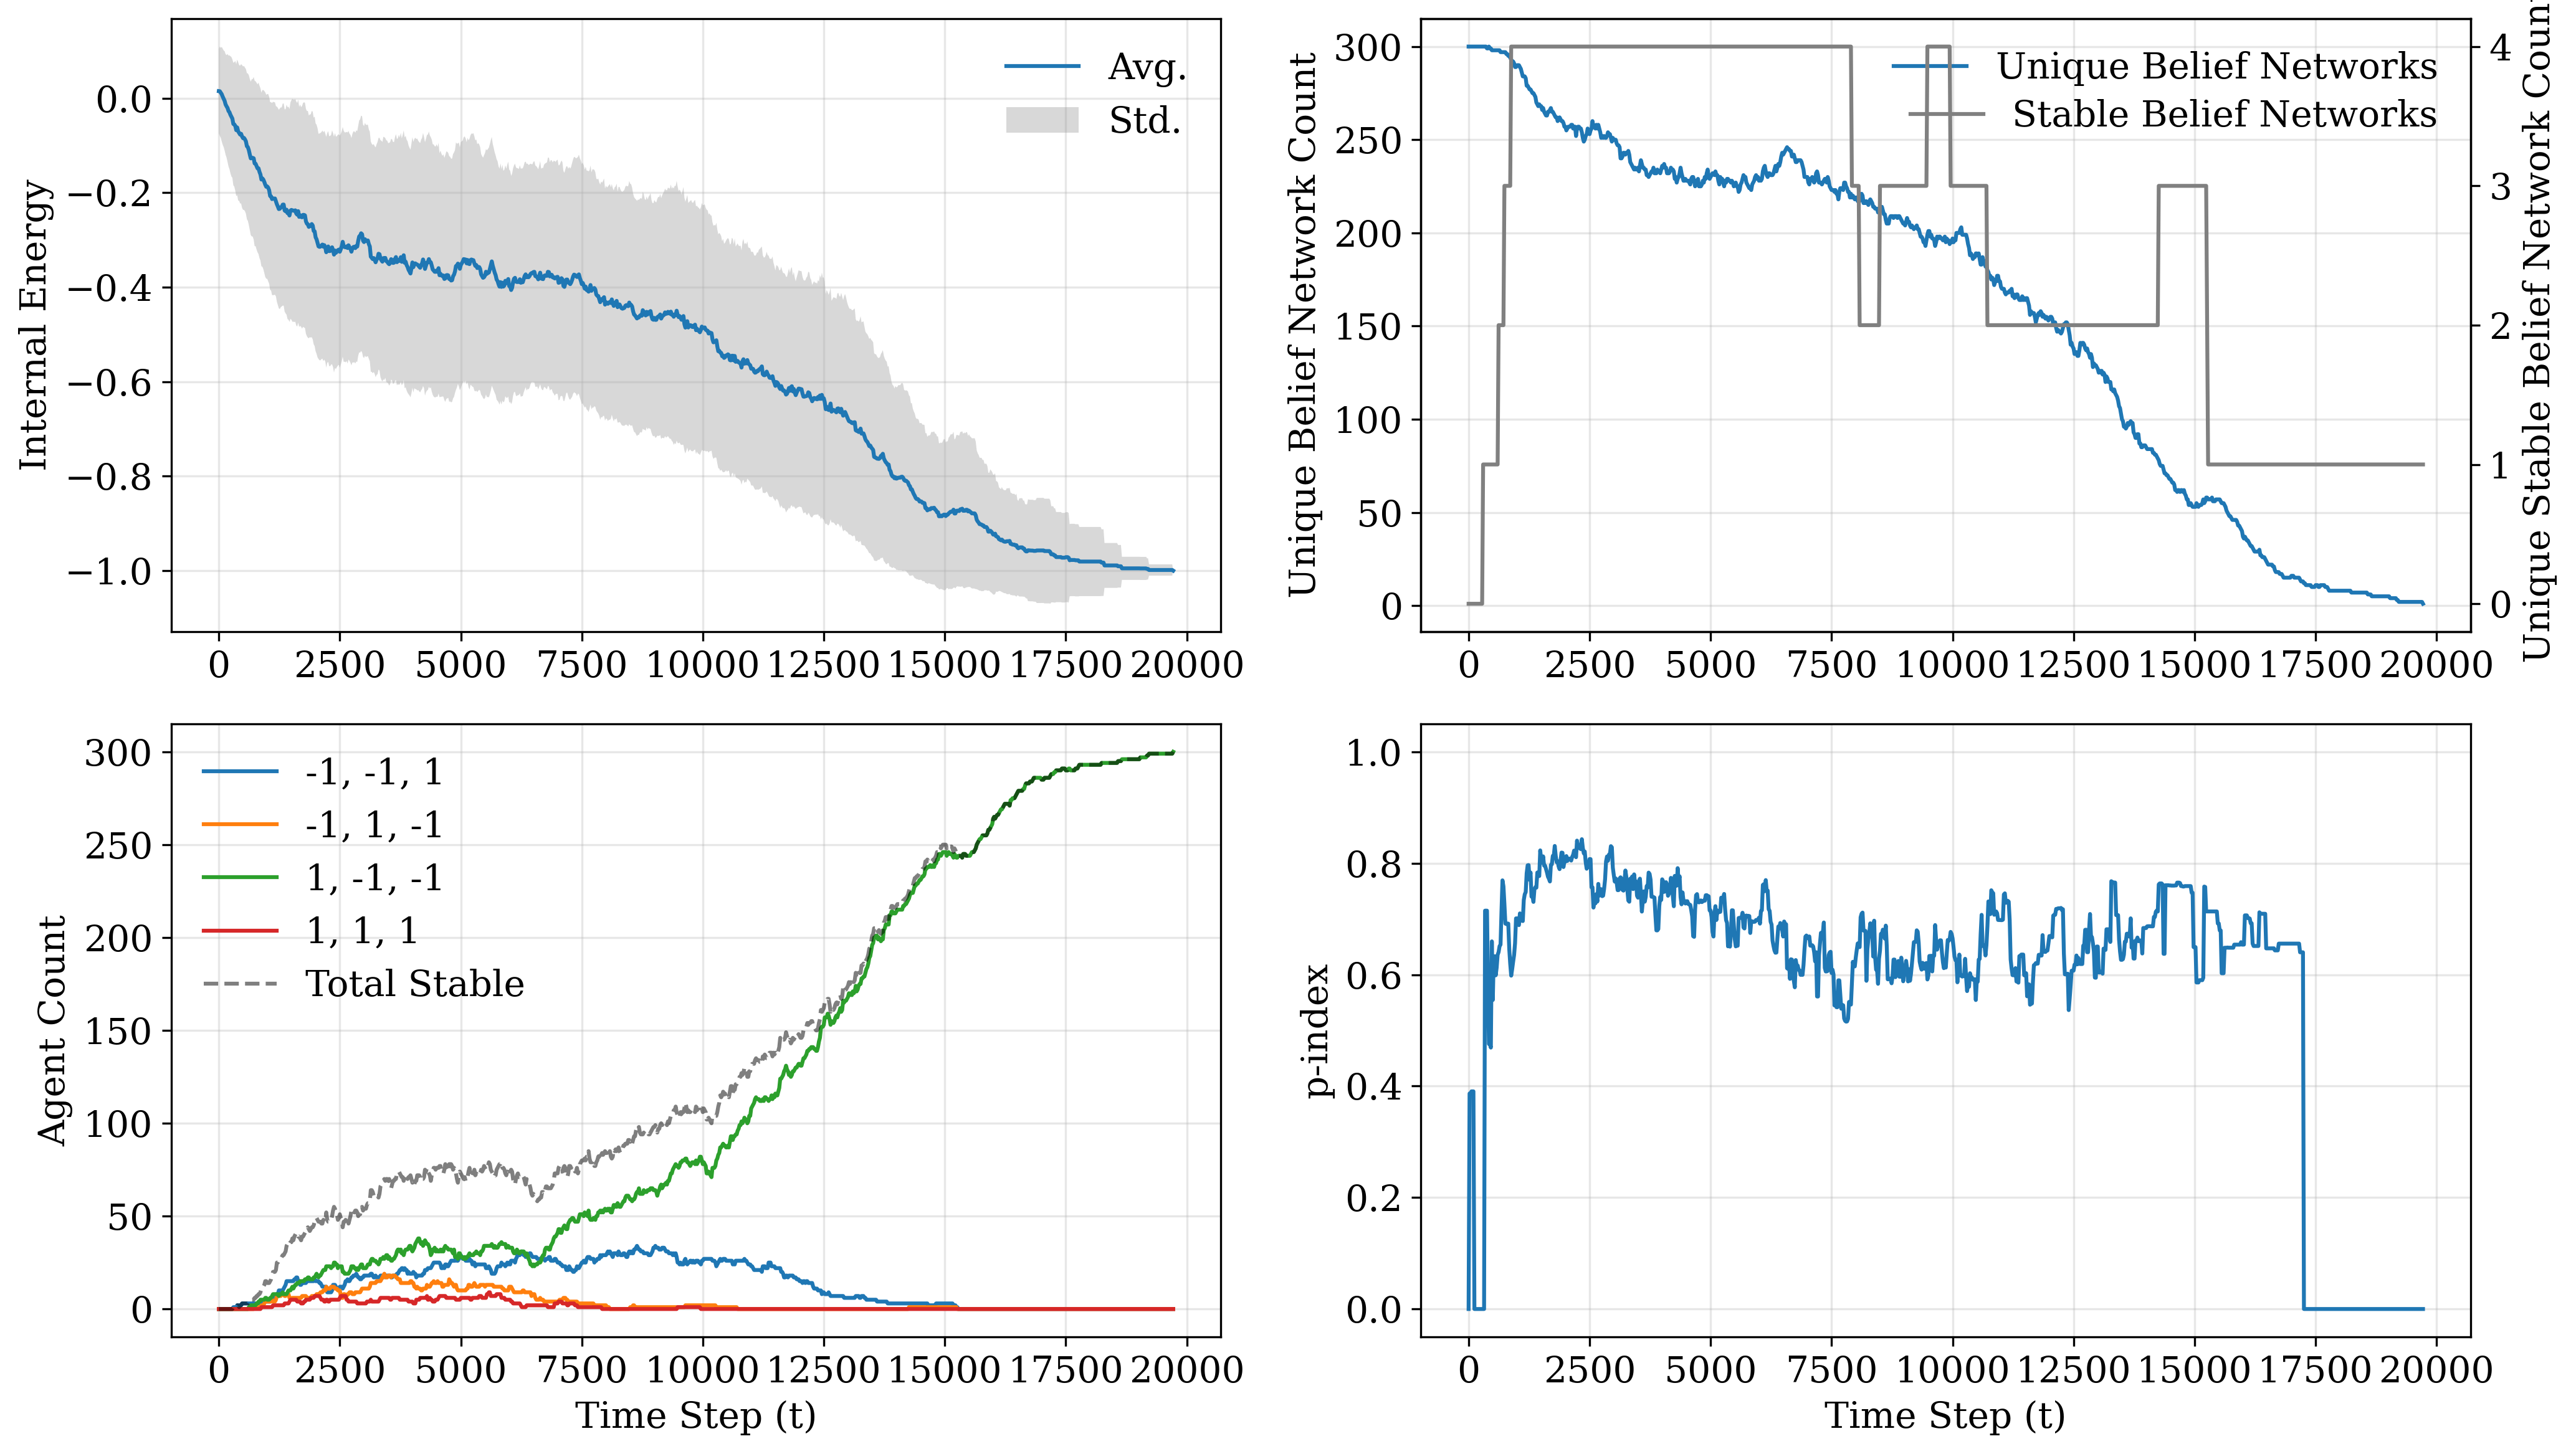

In [61]:
i = 99
track = results[i]
analysis_helper.overall_analysis(n_nodes, track, i, save=True)

In [ ]:
# these breaking points were found manually:
np.array([np.where(existing_stable_cases==4)[0][0], 571, np.where(existing_stable_cases==1)[0][1]])

## **Graph animation**

#### Color the networks according to the iteration and save the figures

In [133]:
def save_figures(iteration):
    plt.figure(figsize=(6,6))
    plt.title(f"Iteration: {iteration}")
    nx.draw(G, pos, node_size = 40, width=.1, node_color = ['lightgray' if c['color']=='gray' else c['color'] for c in track[iteration]['node_coloring'].values()])
    plt.savefig(f'../figures/graph_animation/{iteration}.png', bbox_inches='tight')

In [134]:
import matplotlib as mpl
mpl.rc("figure", dpi=300)

In [135]:
G = graphs[i]
pos = nx.spring_layout(G=G, seed=89)

pool = mp.Pool(processes=32)
pool.map(save_figures, [i for i in track.keys()])

/tmp/ipykernel_1014418/1576157951.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,6))
/tmp/ipykernel_1014418/1576157951.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,6))
/tmp/ipykernel_1014418/1576157951.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

#### Reopen the images and keep them in a list

In [136]:
def update(i):
    im.set_array(image_array[i])
    return im,

In [140]:
from PIL import Image

# file paths
files = glob.glob('/media/volume/data/belief_network_extended/figures/graph_animation/*')

# sort the files
files = [f[0] for f in sorted([(f, int(f.split('/')[-1].split('.')[0])) for f in files], key=lambda x: x[1])]

image_array = []

for f in files:
    
    image = Image.open(f)
    image_array.append(image)

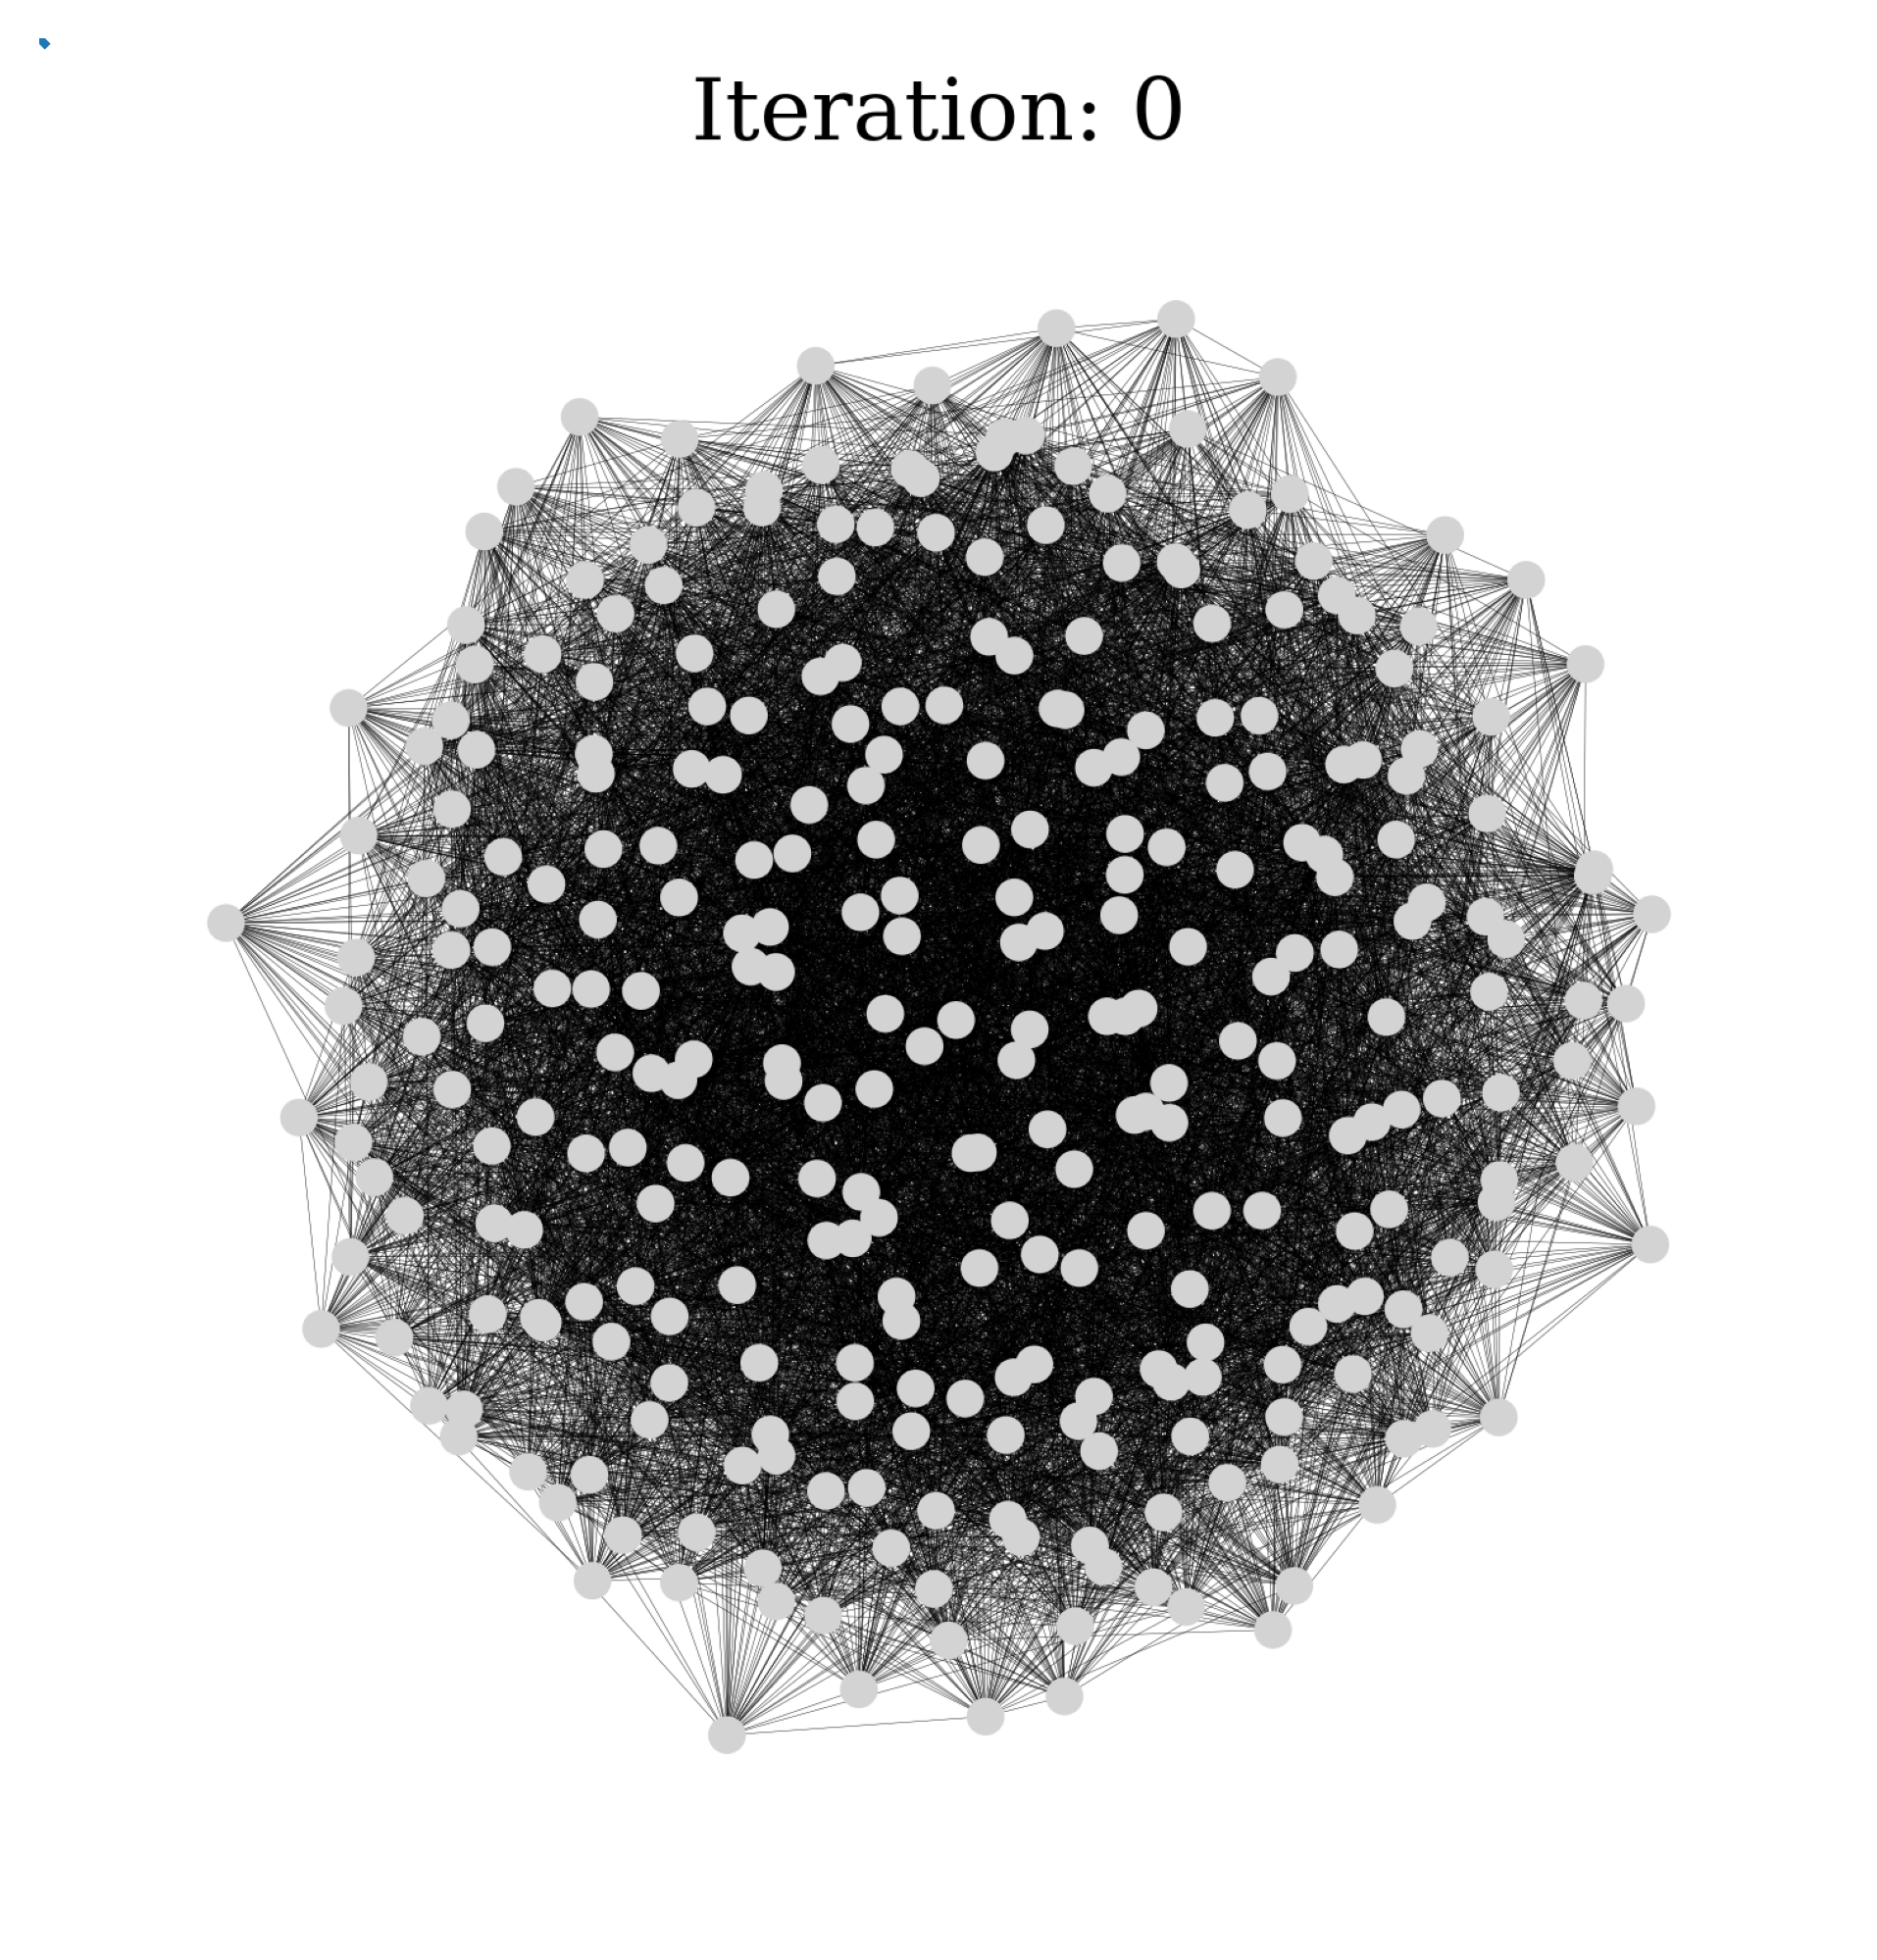

In [141]:
import matplotlib as mpl
import matplotlib.animation as animation
mpl.rc("figure", dpi=400)

# Create the figure and axes objects
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.plot(range(5))

# Set the initial image

im = ax.imshow(image_array[0], animated=True)

In [142]:
animation_fig = animation.FuncAnimation(fig, update, frames=len(image_array), interval=20, blit=True, repeat_delay=10,)

# Show the animation
animation_fig.save(f"../figures/main/simulation_{i}_animated.gif")
#plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


## All Simulations Together

### Run the analyses

In [62]:
internal_energy_analysis_data_sum = extended_model.internal_energy_analysis(results)
better_off_worse_off_data_sum = extended_model.better_off_worse_off_analysis(results)
stability_analysis_data_sum = extended_model.stability_analysis(results, n_nodes = n_nodes)
unique_belief_count_analysis_sum = extended_model.unique_belief_count_analysis(results)
unique_stable_network_count_sum = extended_model.unique_stable_network_count_analysis(results, n_nodes = n_nodes)

In [117]:
polarization_analysis_data_sum = extended_model.polarization_analysis(results)

### Save the results

In [ ]:
temp = internal_energy_analysis_data_sum.copy()
for _ in ['avg', 'upper', 'lower']:
    temp[_] = temp[_].tolist()

with open('../data/internal_energy_analysis_data_sum.json', 'w') as f:
    json.dump(temp, f)

In [ ]:
temp = better_off_worse_off_data_sum.copy()
for c in ['better_off', 'worse_off']:
    for _ in ['avg', 'upper', 'lower']:
        temp[c][_] = temp[c][_].tolist()

with open('../data/better_off_worse_off_data_sum.json', 'w') as f:
    json.dump(temp, f)

In [ ]:
with open('../data/stability_analysis_data.json', 'w') as f:
    json.dump(stability_analysis_data, f, default=float)

### Visualize

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


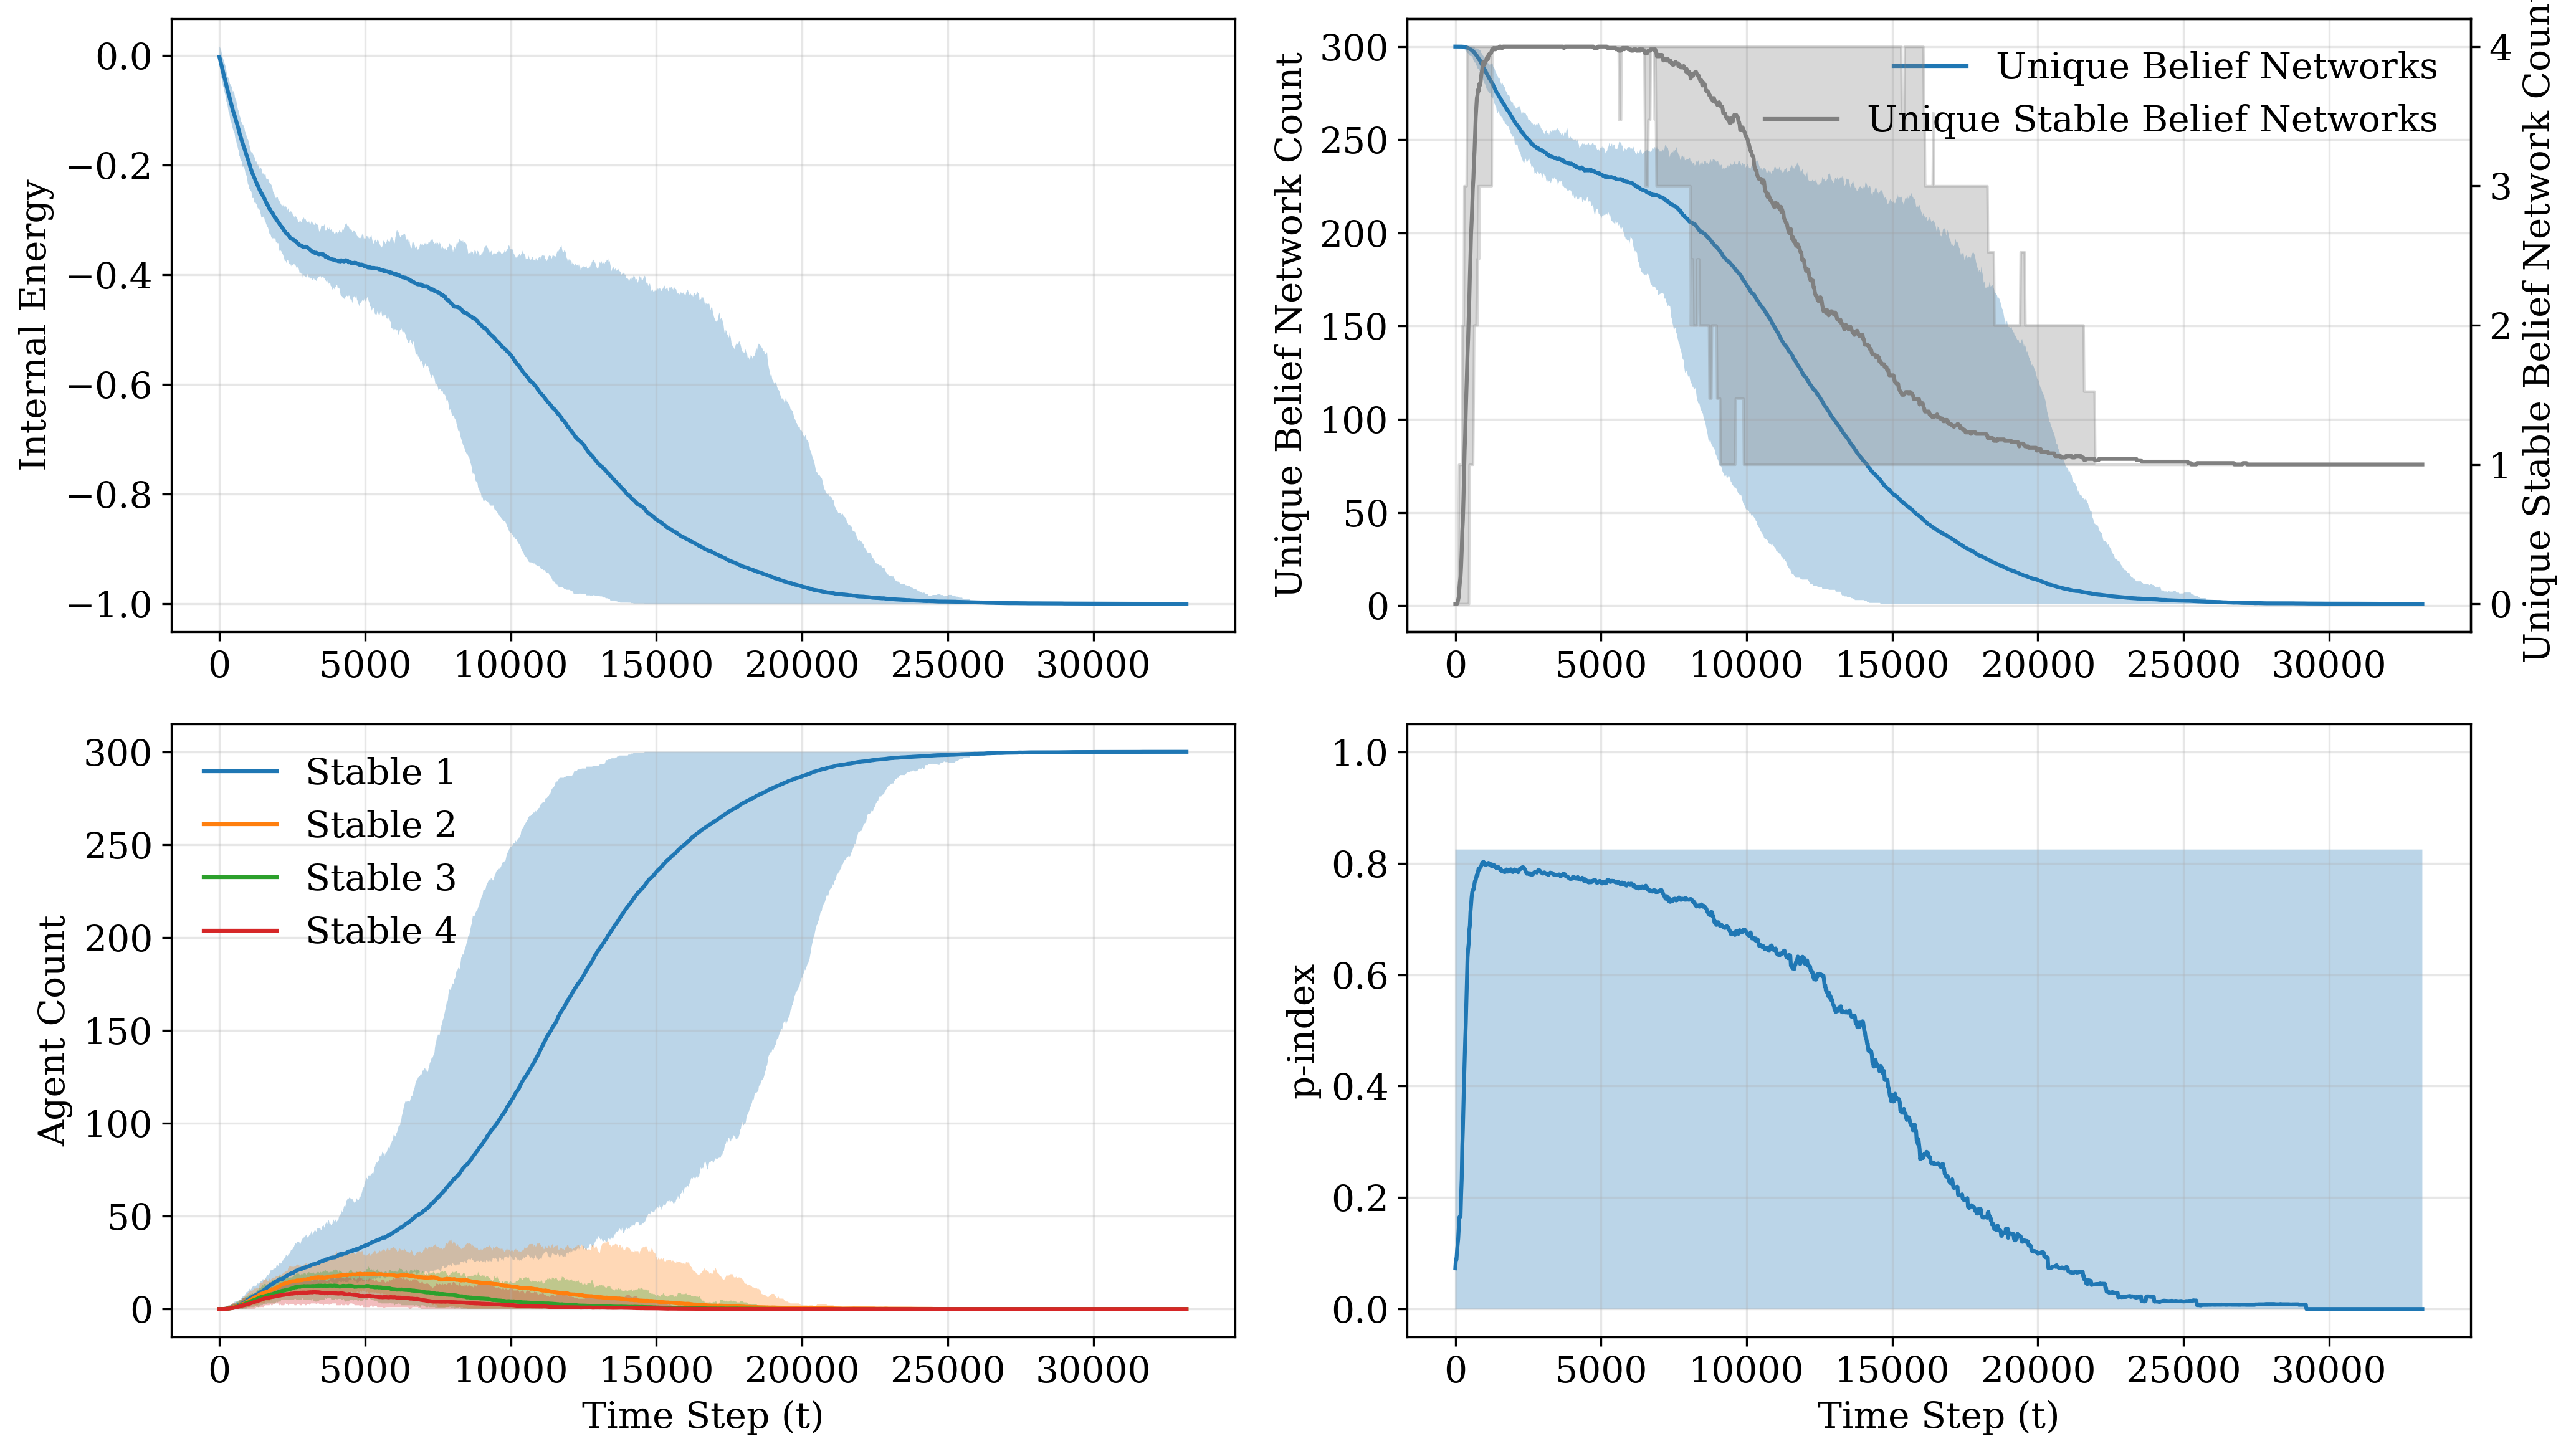

In [131]:
fig, axs = plt.subplots(2,2,figsize=(14,8))

max_T = len(internal_energy_analysis_data_sum['avg'])
x = [i*20 for i in range(max_T)]

for row, col, d, l in zip([0,0,1,1,1,1,1],
                        [0,1,0,0,0,0,1],
                        [internal_energy_analysis_data_sum, 
                        unique_belief_count_analysis_sum,
                        stability_analysis_data_sum[0], stability_analysis_data_sum[1], stability_analysis_data_sum[2], stability_analysis_data_sum[3],
                        polarization_analysis_data_sum],
                        ['','Unique Belief Networks' ,'Stable 1','Stable 2','Stable 3','Stable 4','']):

    #x = d['x']#[i*20 for i in d['x']] if (l != 'Unique Belief Networks') else d['x']

    axs[row][col].plot(x, d['avg'], label=l)
    axs[row][col].fill_between(x, d['lower'], d['upper'], alpha=.3)

for row,col,l in zip([0,0,1,1],[0,1,0,1], ['Internal Energy', 'Unique Belief Network Count', 'Agent Count', 'p-index']):
    axs[row][col].grid(alpha=.3)
    axs[row][col].set_ylabel(l)
    
    axs[row][col].legend(frameon=False)

axs[1][1].set_ylim(-0.05, 1.05)

axs[1][1].set_xlabel('Time Step (t)')
axs[1][0].set_xlabel('Time Step (t)')

loc = plticker.MultipleLocator(base=1.0)

axs2 = axs[0][1].twinx()
axs2.plot(x,
        unique_stable_network_count_sum['avg'],
        color='gray',
        label='Unique Stable Belief Networks'
        )

axs2.fill_between(x, 
                unique_stable_network_count_sum['lower'],
                unique_stable_network_count_sum['upper'], 
                alpha=.3, 
                color='gray',
                )

axs2.set_ylabel('Unique Stable Belief Network Count')
axs2.legend(frameon=False, bbox_to_anchor=(0., .75, 1., .102))

fig.tight_layout()
fig.savefig('../figures/main/all_simulations.pdf')
fig.show()